# Neural Network from Scratch

Based on [cs231](http://cs231n.github.io/) by Stanford

In [6]:
# No Keras! No Pytorch!
# We will use Numpy :))

import numpy as np

In [7]:
import matplotlib
import matplotlib.pyplot as plt
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [46]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

## Define a problem

### 1. Moon data
Generating a dataset

In [8]:
import sklearn.datasets

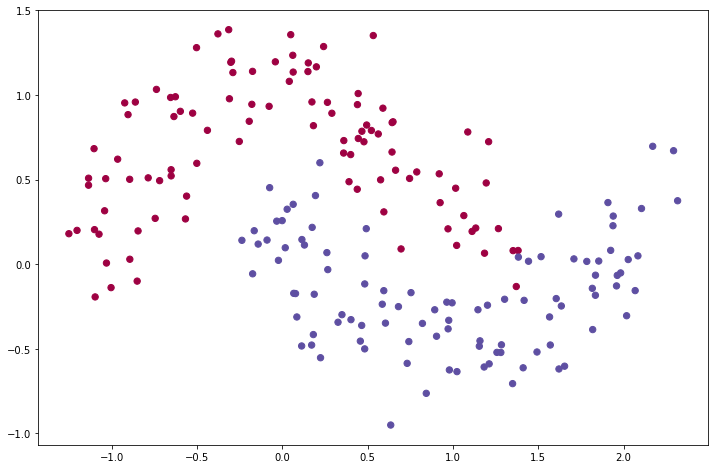

In [103]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, shuffle=False, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [26]:
X.shape, y.shape

((200, 2), (200,))

### 2. Pets classifier

<img src="http://cs231n.github.io/assets/imagemap.jpg" alt="Pets classifier" style="width: 80%"/>

#### 2.1 Syntetic data

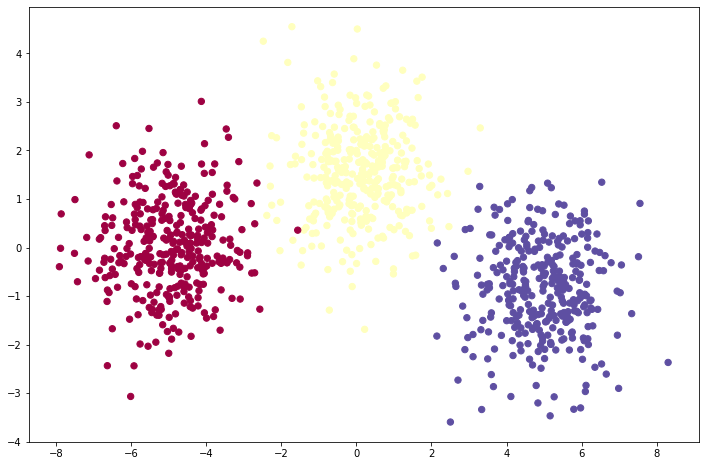

In [47]:
#Syntetic data
np.random.seed(0)
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = sklearn.datasets.make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

## Recap: Softmax Classifier

###### Softmax Function

Softmax function takes an N-dimensional vector of real numbers and transforms it into a vector of real number in range (0,1) which add upto 1

<img src="https://eli.thegreenplace.net/images/2016/softmax-layer-generic.png" alt="Softmax" style="width: 50%"/>



$$p_k = \dfrac{e^{f_k}}{\sum_{j} e^{f_j}}$$


Applying **Bayes' rule** gives us the softmax function as a natural representation for the posterior distribution in a multi-class classification problem.:

$$% <![CDATA[
\begin{eqnarray}
p(w_i | x) & = & \frac{p(x|w_i) p(w_i)}{p(x)} \\
 & = & \frac{p(x|w_i) p(w_i)}{\sum_j p(x|w_j) p(w_j)} \\
 & = & \frac{exp(log(p(x|w_i) p(w_i)))}{\sum_j exp(log(p(x|w_j) p(w_j)))} \\
 & = & \frac{e^{f_i (x)}}{\sum_j e^{f_j (x)}}
\end{eqnarray} %]]>$$



### Cross-entropy loss

Cross entropy indicates the distance between what the model believes the output distribution should be, and what the original distribution really is. It is defined as:

$$H(y,p) = - \sum_i y_i log(p_i)$$



*Negative Log-Likelihood* (NLL): 

<img src="https://ljvmiranda921.github.io/assets/png/cs231n-ann/neg_log.png" alt="Softmax" style="width: 40%"/>




$$L(\mathbf{y}) = -\log(\mathbf{y})$$


<img src="https://ljvmiranda921.github.io/assets/png/cs231n-ann/neg_log_demo.png" alt="Softmax" style="width: 90%"/>

Let's take its **derivative**:

$$% <![CDATA[
\dfrac{\partial L_i}{\partial f_k} = \dfrac{\partial L_i}{\partial p_k} \dfrac{\partial p_k}{\partial f_k}$$
$$\dfrac{\partial L_i}{\partial p_k} = -\dfrac{1}{p_k}$$


Derivative of **softmax**:

let's $\Sigma = \sum_{j} e^{f_j}$

$$
\begin{eqnarray}
\dfrac{\partial p_k}{\partial f_k} &=& \dfrac{\partial}{\partial f_k} \left(\dfrac{e^{f_k}}{\sum_{j} e^{f_j}}\right) \\
&=& \dfrac{\Sigma \mathbf{D} e^{f_k} - e^{f_k} \mathbf{D} \Sigma}{\Sigma^2} \\
&=& \dfrac{e^{f_k}(\Sigma - e^{f_k})}{\Sigma^2}&=& \dfrac{e^{f_k}}{\Sigma} \dfrac{\Sigma - e^{f_k}}{\Sigma} \\
&=& p_k * (1-p_k)
\end{eqnarray}$$


By combining the two derivatives, we have:

$$% <![CDATA[
\begin{eqnarray}
\dfrac{\partial L_i}{\partial f_k} &=& \dfrac{\partial L_i}{\partial p_k} \dfrac{\partial p_k}{\partial f_k} \\
&=& -\dfrac{1}{p_k} (p_k * (1-p_k)) \\
&=& (p_k - 1)
\end{eqnarray} %]]>$$

Total loss is then defined as the average NLL over the training examples and the regularization:

$$L=\underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \frac{1}{2} \lambda \sum_k\sum_l W_{k,l}^2 }_\text{regularization loss}$$

In [54]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

In [62]:
class Classifier(object):
    """Base class for classifiers."""

    def fit(X, y):
        pass
    
    def predict(X):
        pass

    
class Softmax(Classifier):
    
    def __init__(self,
                 add_intercept=True,
                 learning_rate=0.01,
                 max_iteration=1000,
                 verbose=0,
                 early_stopping=True,
                 max_iter_without_loss=5
                ):
        self.n_classes = np.max(y) + 1
        self.add_intercept = add_intercept
        self.learning_rate = learning_rate
        self.max_iteration = max_iteration
        self.verbose = verbose
        self.early_stopping = early_stopping
        self.max_iter_without_loss = max_iter_without_loss

    
    @staticmethod
    def _softmax(z):
        return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T
    
    @staticmethod
    def _loss(y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    
    @staticmethod
    def _one_hot(y, n_labels):
        mat = np.zeros((len(y), n_labels))
        for i, val in enumerate(y):
            mat[i, val] = 1
        return mat
    
    
    def fit(self, X, y):
        if self.add_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.hstack((intercept, X))
            
            
        y_enc = self._one_hot(y, self.n_classes)
        self.weights = np.zeros((X.shape[1], self.n_classes)) # (number of fearures, number of classess)
    
        min_loss = 10**6
        n_iter_no_change = 0
        for i in range(self.max_iteration):
            # get preds
            scores = np.dot(X, self.weights)
            predictions = self._softmax(scores)

            # how much did we miss?
            loss = self._loss(y_enc, predictions)
            d_loss = y_enc - predictions
            
            if self.verbose:
                if (i % 1) == 0:
                    print(loss)

            # update weights
            self.weights = self.weights + self.learning_rate * np.dot(X.T, d_loss)
            
            #early stopping
            if loss < min_loss:
                min_loss = loss
                n_iter_no_change = 0
            else:
                n_iter_no_change += 1
                
                
            if self.early_stopping:
                if n_iter_no_change == self.max_iter_without_loss:
                    if self.verbose:
                        print(f'Stopped on {i} interation with loss {min_loss}')
                    break

    def predict_proba(self, X):
        if self.add_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.hstack((intercept, X))
            
        scores = np.dot(X, self.weights)
        predictions = self._softmax(scores)
        return predictions
                    
    def _to_classlabels(self, z):
        return z.argmax(axis=1) 
            
    def predict(self, X):
        return self._to_classlabels(self.predict_proba(X))

In [ ]:
lr = Softmax(verbose=1)
lr.fit(X, y)

In [ ]:
plot_decision_boundary(lr.predict)

## Basic Neural Network: Perceptron

<tr>
    <td> <img src="http://cs231n.github.io/assets/nn1/neuron.png" alt="Biological Neuron" style="width: 100%;"/> </td>
    <td> <img src="http://cs231n.github.io/assets/nn1/neuron_model.jpeg" alt="Artificial Neuron" style="width: 100%;"/> </td>
</tr>

In [96]:
# perceptron function
def activation(x):
    return np.where( x > 0 , 1, 0)

In [112]:
# moons dataset
X, y = sklearn.datasets.make_moons(200, shuffle=False, noise=0.20)

In [113]:
w0 = np.random.uniform(-1, 1, size=2)
b = 0

In [114]:
LR = 0.01
MAX_ITERATIONS = 100
for j in range(MAX_ITERATIONS):
    # forward propagation
    l0 = X  # zero layer
    l1 = activation(np.dot(l0, w0) + b)  # first layer
    
    # how much did we miss?
    l1_error = y - l1
    error = np.mean(np.abs(l1_error))
    
    if (j % 10) == 0:
        print("Error:", error, 'Weight: ', w0, b)
    
    # backpropagation
    l1_delta = l1_error
    
    # update weights
    w0 += np.dot(l0.T, l1_delta)
    b += np.sum(l1_delta, axis=0)


Error: 0.56 Weight:  [-0.36473625 -0.34209248] 0
Error: 0.08 Weight:  [ 11.70630531 -58.20964088] 12
Error: 0.125 Weight:  [ 30.76652523 -87.74498081] -2
Error: 0.105 Weight:  [ 13.01074676 -49.7136468 ] 15
Error: 0.13 Weight:  [ 20.09298782 -58.35726416] 21
Error: 0.095 Weight:  [ 12.58660929 -63.21476748] 16
Error: 0.09 Weight:  [ 14.34150598 -70.50929055] 13
Error: 0.245 Weight:  [ 66.38909292 -54.9658601 ] 46
Error: 0.135 Weight:  [ 17.12964558 -47.89729123] 19
Error: 0.23 Weight:  [ 42.92714524 -51.10722002] 33


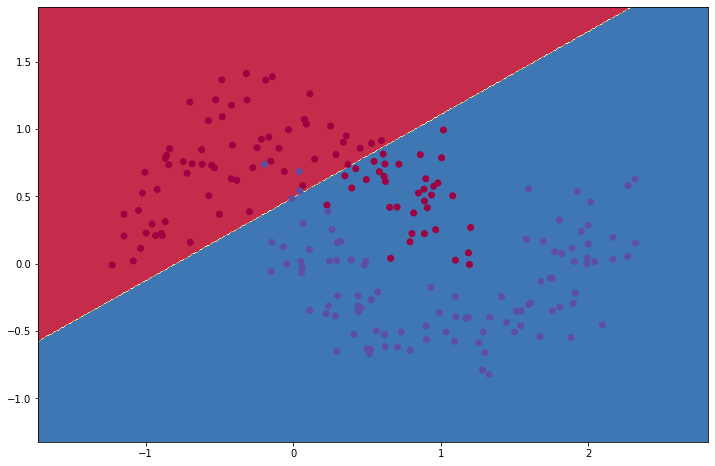

In [115]:
# Helper function to predict an output (0 or 1)
def predict(weights, b, x):
    prob = activation(np.dot(x, weights) + b)
    return prob.round().astype(int)

plot_decision_boundary(lambda x: predict(w0, b, x))

### Percepton vs SVM vs Softmax

<img src="http://cs231n.github.io/assets/svmvssoftmax.png" alt="SVM and Softmax" style="width: 80%"/>

Loss for the i-th example:



**SVM**

$L_i = \sum_{j\neq y_i} \max(0, s_j - s_{y_i} + \Delta)$, where $s_j = f(x_i, W)_j$

**Softmax**

$L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) \hspace{0.5in} \text{or equivalently} \hspace{0.5in} L_i = -f_{y_i} + \log\sum_j e^{f_j}$

## Optimization

#### Strategy #1 and #2: Random search

In [128]:
w0 = np.random.uniform(-1, 1, size=2)
b = 0

In [134]:
bestloss = 1000000000
bestW = w0
bestB = b

LR = 0.01
MAX_ITERATIONS = 100

for j in range(MAX_ITERATIONS):
    
    # Strategy #1: Random search
    w0 = np.random.randn(2)
    b = np.random.randn()
    
    #Strategy #2: Random Local Search
#     step_size = 1
#     w0 = w0 + np.random.randn(2) * LR
#     b = b + np.random.randn() * LR
    
    # forward propagation
    l0 = X
    l1 = activation(np.dot(l0, w0) + b)
    
    # how much did we miss?
    l1_error = y - l1
    
    if np.mean(np.abs(l1_error)) < bestloss:
        bestloss = np.mean(np.abs(l1_error))
        bestW = w0
        bestB = b
    
    if (j % 10) == 0:
        print("Error:", bestloss, 'Weight: ', w0, b)
    

Error: 0.5 Weight:  [0.52149424 1.08094667] 0.8893759081552546
Error: 0.195 Weight:  [-0.0292944  -0.29233868] -0.19353711101102694
Error: 0.165 Weight:  [ 1.56109856 -1.13153924] -0.29623165439820726
Error: 0.095 Weight:  [-2.04639314 -1.80969019] -1.859523605626927
Error: 0.095 Weight:  [ 1.24072624 -0.20361502] 0.4282922606938115
Error: 0.095 Weight:  [-0.82126507 -0.91365564] 1.817826413261076
Error: 0.095 Weight:  [0.69551831 0.00593881] -1.0489003714627145
Error: 0.095 Weight:  [0.23777963 0.97513841] -1.3293365693342671
Error: 0.095 Weight:  [0.0068612  1.12422173] 2.2948811662553914
Error: 0.095 Weight:  [ 0.21317626 -1.20324346] 1.178031235143372


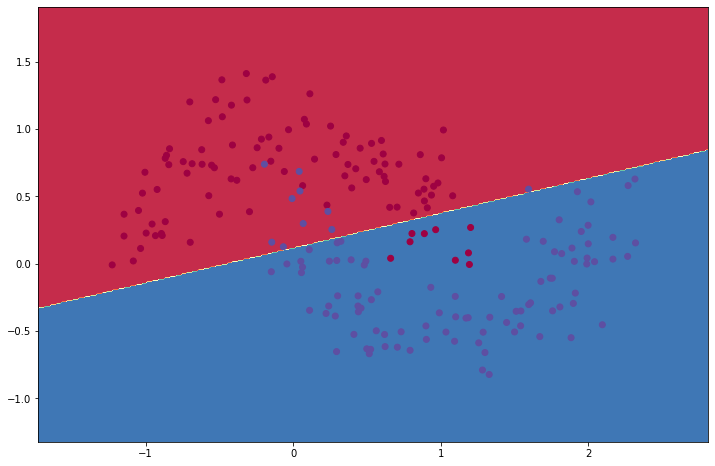

In [135]:
plot_decision_boundary(lambda x: predict(bestW, bestB, x))

### Strategy #3: Following the Gradient

$$\frac{df(x)}{dx} = \lim_{h\ \to 0} \frac{f(x + h) - f(x)}{h}$$

Finite difference approximation:

$$\frac{df(x)}{dx} = \frac{f(x + h) - f(x)}{h} \hspace{0.1in} \text{(bad, do not use)}$$


$$\frac{df(x)}{dx} = \frac{f(x + h) - f(x - h)}{2h} \hspace{0.1in} \text{(use instead)}$$

In [205]:
# def activation(x):
#     return 1/(1 + np.exp(-x))
# plt.plot(x, activation(x))

In [206]:
def loss(w):
    l0 = X
    l1 = activation(np.dot(l0, w))
    
    # how much did we miss?
    l1_error = y - l1
    return np.mean(np.abs(l1_error))

In [207]:
def eval_numerical_gradient(f, x):
    """ 
    a naive implementation of numerical gradient of f at x 
    - f should be a function that takes a single argument
    - x is the point (numpy array) to evaluate the gradient at
    """ 

    fx = f(x) # evaluate function value at original point
    grad = np.zeros(x.shape)
    h = 0.00001

    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        old_value = x[ix]
        x[ix] = old_value + h # increment by h
        fxh = f(x) # evalute f(x + h)
        x[ix] = old_value # restore to previous value (very important!)

        # compute the partial derivative
        grad[ix] = (fxh - fx) / h # the slope
        it.iternext() # step to next dimension

    return grad

In [208]:
w0 = np.random.uniform(-1, 1, size=2)

In [209]:
w0

array([0.33018653, 0.22140536])

In [210]:
df = eval_numerical_gradient(loss, w0)

In [212]:
w0 = np.random.uniform(-1, 1, size=2)
LR = 0.1
MAX_ITERATIONS = 500

for j in range(MAX_ITERATIONS):
    # forward propagation
    l0 = X
    l1 = activation(np.dot(l0, w0)) # hardcode bias
    
    # how much did we miss?
    l1_error = y - l1
    
    if (j % 10) == 0:
        print("Error:", str(np.mean(np.abs(l1_error))), 'Weight: ', w0)
        
    # gradient descent
    df = eval_numerical_gradient(loss, w0)
    w0 = w0 - LR * df

Error: 0.5240721686744707 Weight:  [0.26270373 0.59032426]
Error: 0.49941951721729455 Weight:  [0.38710738 0.49440836]
Error: 0.4760933103813624 Weight:  [0.50552263 0.39776576]
Error: 0.4545154164684276 Weight:  [0.61640935 0.30120779]
Error: 0.4348503761935252 Weight:  [0.71904365 0.20542917]
Error: 0.41708226260602316 Weight:  [0.81331793 0.11097887]
Error: 0.4010922371073512 Weight:  [0.89951964 0.01826211]
Error: 0.3867152311837982 Weight:  [ 0.97815277 -0.07244178]
Error: 0.3737743874511701 Weight:  [ 1.04981608 -0.16095645]
Error: 0.36209924509841357 Weight:  [ 1.11512884 -0.24718603]
Error: 0.3515339599290662 Weight:  [ 1.1746897  -0.33109556]
Error: 0.341940046382287 Weight:  [ 1.22905627 -0.41269481]
Error: 0.33319636191817087 Weight:  [ 1.27873695 -0.49202536]
Error: 0.3251978403200703 Weight:  [ 1.32418958 -0.56915055]
Error: 0.31785375900741086 Weight:  [ 1.3658235  -0.64414775]
Error: 0.31108592801700347 Weight:  [ 1.40400343 -0.71710268]
Error: 0.3048269790835483 Weight:

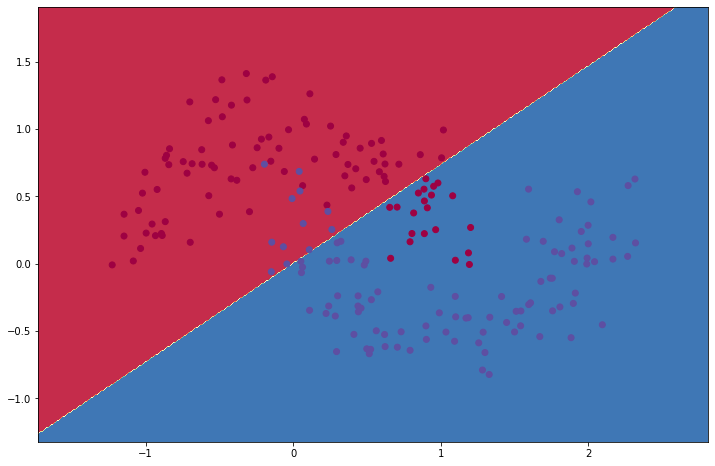

In [213]:
# Helper function to predict an output (0 or 1)
def predict(weights, x):
    prob = activation(np.dot(x, weights))
    return prob.round().astype(int)

plot_decision_boundary(lambda x: predict(w0, x))

## Gradient descent

<img src="https://miro.medium.com/max/699/1*mElyetzsTIJrNnKI8kTkCw.jpeg"  alt="Gradient Descent" style="width: 50%"/>

```python
# Vanilla Gradient Descent
while True:
    weights_grad = evaluate_gradient(loss_fun, data, weights)
    weights += - step_size * weights_grad # perform parameter update
```
    
    
```python
# Vanilla Minibatch Gradient Descent
while True:
  data_batch = sample_training_data(data, 256) # sample 256 examples
  weights_grad = evaluate_gradient(loss_fun, data_batch, weights)
  weights += - step_size * weights_grad # perform parameter update</pre>
```



Effect of **step size**. The gradient tells us the direction in which the function has the steepest rate of increase, but it does not tell us how far along this direction we should step.

<img src="http://cs231n.github.io/assets/stepsize.jpg" alt="step size" style="width: 50%"/>



## Neural Networks and Backpropagation

Define NN:

<img src="https://mlfromscratch.com/content/images/2019/12/neural-networks-3.png" alt="step size" style="width: 40%"/>

$$a^{(l)}=
    \sigma\left(
    \boldsymbol{W}\boldsymbol{a}^{l-1}+\boldsymbol{b}
    \right)$$
    
    
$$\sigma \left(
    \begin{bmatrix}
    w_{0,0} & w_{0,1} & \cdots & w_{0,k}\\
    w_{1,0} & w_{1,1} & \cdots & w_{1,k}\\
    \vdots & \vdots & \ddots & \vdots \\
    w_{j,0} & w_{j,1} & \cdots & w_{j,k}\\
    \end{bmatrix}
    \, 
    \begin{bmatrix}
    a_0^{0}\\
    a_1^{0}\\
    \vdots \\
    a_n^{0}\\
    \end{bmatrix}
    +
    \begin{bmatrix}
    b_0\\
    b_1\\
    \vdots \\
    b_n\\
    \end{bmatrix}
    \right)$$

This takes us forward, until we get an output. We measure how good this output $\hat{y}$  is by a cost function 
$C$ and the result we wanted in the output layer $y$, and we do this for every example. This one is commonly called mean squared error (MSE):


$$C = \frac{1}{n} \sum_{i=1}^n (y_i-\hat{y}_i)^2$$


To update the network, we do gradient descent:

$$w^{(L)} = w^{(L)} - \text{learning rate} \times \frac{\partial C}{\partial w^{(L)}}$$

$$C=(y-a^{(L)})^2$$

$$a^{(L)}=
    \sigma\left(
    \boldsymbol{z}^{(L)}
    \right)$$

$$z^{(L)}=w^{(L)} \times a +b$$


Apply chain rule:

$$\frac{\partial C}{\partial w^{(L)}}
    =
    \frac{\partial C}{\partial a^{(L)}}
    \frac{\partial a^{(L)}}{\partial z^{(L)}}
    \frac{\partial z^{(L)}}{\partial w^{(L)}}
    =
    2 \left(y - a^{(L)}  \right) \sigma' \left(z^{(L)}\right) a^{(L-1)}$$
    

Sigmoid activations:

$\displaystyle a = \sigma(z)=\frac{1}{1+e^{-z}}$

$\displaystyle \sigma'(z)=\frac{d}{dz}\sigma(z)=\sigma(z)(1-\sigma(z))$

    
    
### Going Deeper


<img src="https://i.kym-cdn.com/photos/images/newsfeed/000/531/557/a88.jpg" alt="Going Deeper" style="width: 50%"/>

Second layer:
$$\frac{\partial C}{\partial w^{(2)}}
    =
    \frac{\partial C}{\partial a^{(2)}}
    \frac{\partial a^{(2)}}{\partial z^{(2)}}
    \frac{\partial z^{(2)}}{\partial w^{(2)}}$$
    
$$\frac{\partial C}{\partial b^{(2)}}
    =
    \frac{\partial C}{\partial a^{(2)}}
    \frac{\partial a^{(2)}}{\partial z^{(2)}}
    \frac{\partial z^{(2)}}{\partial b^{(2)}}$$
    
First layer:
$$\frac{\partial C}{\partial w^{(1)}}
    =
    \underbrace{
    \frac{\partial C}{\partial a^{(2)}}
    \frac{\partial a^{(2)}}{\partial z^{(2)}}
    }_\text{Reused from $\frac{\partial C}{\partial w^{(2)}}$}
    \,
    \frac{\partial z^{(2)}}{\partial a^{(1)}}
    \frac{\partial a^{(1)}}{\partial z^{(1)}}
    \frac{\partial z^{(1)}}{\partial w^{(1)}}$$
    
    
$$\frac{\partial C}{\partial b^{(1)}}
    =
    \underbrace{
    \frac{\partial C}{\partial a^{(2)}}
    \frac{\partial a^{(2)}}{\partial z^{(2)}}
    }_\text{Reused from $\frac{\partial C}{\partial b^{(2)}}$}
    \,
    \frac{\partial z^{(2)}}{\partial a^{(1)}}
    \frac{\partial a^{(1)}}{\partial z^{(1)}}
    \frac{\partial z^{(1)}}{\partial b^{(1)}}$$
    
    
Check [this video](https://www.youtube.com/watch?v=Ilg3gGewQ5U)


## Multilayer Perceptron

In [275]:
X, y = sklearn.datasets.make_moons(200, shuffle=False, noise=0.20)

In [290]:
HIDDEN_LAYER_SIZE = 10
LEARNING_RATE = 0.1

w0 = 2*np.random.random((2,HIDDEN_LAYER_SIZE)) - 1
b0 = np.zeros((1, HIDDEN_LAYER_SIZE))
w1 = 2*np.random.random((HIDDEN_LAYER_SIZE, 1)) - 1
b1 = np.zeros((1))

In [291]:
def activation(x, deriv=False):
    if deriv:
        return activation(x) * (1 - activation(x))
    return 1/(1 + np.exp(-x))

In [292]:
%%time
for j in range(1000):
    
    # forward propagation
    a0 = X
    z1 = np.dot(a0, w0) + b0
    a1 = activation(z1)
    z2 = np.dot(a1, w1) + b1
    a2 = activation(z2)
    
    # how much did we miss?
    l2_error = a2 - y[:,np.newaxis]
    
    if (j % 100) == 0:
        print("Error:" + str(np.mean(np.abs(l2_error))))
    
    # back propagation
    l2_delta = l2_error * activation(z2, deriv=True)
    
    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * activation(z1, deriv=True)
        
    
    # update weights
    w1 -= LEARNING_RATE * a1.T.dot(l2_delta)
    b1 -= LEARNING_RATE * np.sum(l2_delta, axis=0)
    w0 -= LEARNING_RATE * a0.T.dot(l1_delta)
    b0 -= LEARNING_RATE * np.sum(l1_delta, axis=0)

Error:0.5607434624446956
Error:0.18275053266771882
Error:0.1794545688775176
Error:0.13991456149776227
Error:0.10800117293948362
Error:0.08964323449374943
Error:0.07751494368938215
Error:0.06830469445697909
Error:0.06070904109667438
Error:0.054669989903442906
CPU times: user 142 ms, sys: 4.67 ms, total: 147 ms
Wall time: 148 ms


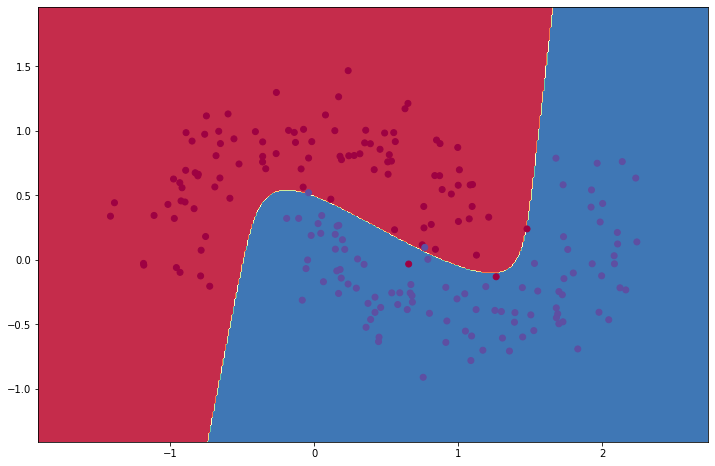

In [293]:
# Helper function to predict an output (0 or 1)
def predict(weights, b, x):
    l1 = activation(np.dot(x, weights[0]) + b[0])
    prob = activation(np.dot(l1, weights[1]) + b[1])
    return prob.round().astype(int)

plot_decision_boundary(lambda x: predict((w0, w1), (b0, b1), x))

### Activations

<img src="https://miro.medium.com/max/2384/1*4ZEDRpFuCIpUjNgjDdT2Lg.png" alt="Activations" style="width: 80%"/>


Check more functions here - https://mlfromscratch.com/activation-functions-explained/#/

and here - https://dvgodoy.github.io/dl-visuals/Activation%20Functions/

Try [online demo by Stanford](https://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html)

*TLDR*: “What neuron type should I use?” Use the **ReLU** non-linearity, be careful with your learning rates and possibly monitor the fraction of “dead” units in a network. If this concerns you, try **Leaky ReLU**/**ELU**/**SELU**. Never use sigmoid.


### Regularizaion

* L1/L2 regularization
* Dropout
* Augmentations

<img src="http://cs231n.github.io/assets/nn2/dropout.jpeg" alt="Dropout" style="width: 50%"/>

---

##  -- Homework --

1. Try other activation function (tanh, relu)

1. Add regularization 

1. Add dropout (http://cs231n.github.io/neural-networks-2/)


---

## Sources

* [cs231](http://cs231n.github.io/) by Stanford
* [https://mlfromscratch.com/neural-networks-explained](https://mlfromscratch.com/neural-networks-explained)